In [1]:
import pandas as pd
header = ["polaridad", "id_tweet", "Fecha_tweet", "Búsqueda", "Usuario_tweeteado", "text_tweet"]
tweets = pd.read_csv('../data/training.1600000.processed.noemoticon.csv', header=None, names=header)


In [2]:
tweets.head(4)


,polaridad,id_tweet,Fecha_tweet,Búsqueda,Usuario_tweeteado,text_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire


In [3]:
# Eliminar la columna "polaridad"
tweets = tweets.drop("polaridad", axis=1)


In [4]:
tweets.head()

,id_tweet,Fecha_tweet,Búsqueda,Usuario_tweeteado,text_tweet
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


la polaridad calculada con una funcion de limpiar texto 

In [5]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import textstat
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Descargar recursos necesarios (ejecutar solo una vez)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Leer el dataset de tweets
df2=tweets

# Inicializar el analizador de polaridad
sia = SentimentIntensityAnalyzer()

# Preprocesamiento básico de texto
def preprocess_text(text):
    # Convertir a minúsculas
    text = text.lower()

    # Eliminar caracteres de puntuación
    text = re.sub(r'[^\w\s]', '', text)

    # Eliminar dígitos
    text = re.sub(r'\d+', '', text)

    # Eliminar espacios adicionales
    text = re.sub(r'\s+', ' ', text)

    # Tokenización de palabras
    tokens = word_tokenize(text)

    # Eliminar palabras de parada (stop words)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lematización de palabras
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Unir tokens procesados en un texto limpio
    clean_text = ' '.join(tokens)

    return clean_text

# Preprocesar los tweets
df2['clean_text'] = df2['text_tweet'].apply(preprocess_text)

# Calcular la polaridad de los tweets
df2['polarity'] = df2['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Calcular la complejidad de lectura de los tweets
df2['reading_ease'] = df2['clean_text'].apply(lambda x: textstat.flesch_reading_ease(x))

# Calcular la complejidad de escritura de los tweets
df2['writing_ease'] = df2['clean_text'].apply(lambda x: textstat.flesch_kincaid_grade(x))

# Distribución de las polaridades
polarity_distribution = df2['polarity'].value_counts(normalize=True)

# Distribución de la complejidad de lectura
reading_ease_distribution = df2['reading_ease'].value_counts(normalize=True)

# Distribución de la complejidad de escritura
writing_ease_distribution = df2['writing_ease'].value_counts(normalize=True)

print("Distribución de polaridades:")
print(polarity_distribution)

print("\nDistribución de complejidad de lectura:")
print(reading_ease_distribution)

print("\nDistribución de complejidad de escritura:")
print(writing_ease_distribution)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\firef\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\firef\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\firef\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\firef\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Distribución de polaridades:
 0.0000    2.668412e-01
 0.4404    3.288500e-02
 0.3612    2.004375e-02
 0.4019    1.883250e-02
 0.4215    1.723312e-02
               ...     
 0.6263    6.250000e-07
-0.7348    6.250000e-07
 0.1322    6.250000e-07
-0.5110    6.250000e-07
-0.2360    6.250000e-07
Name: polarity, Length: 11765, dtype: float64

Distribución de complejidad de lectura:
 93.81      2.359750e-02
 75.88      2.349313e-02
 83.32      2.191750e-02
 59.97      2.163375e-02
 92.80      2.121312e-02
                ...     
-695.01     6.250000e-07
-216.85     6.250000e-07
-1275.70    6.250000e-07
-950.84     6.250000e-07
-1147.79    6.250000e-07
Name: reading_ease, Length: 572, dtype: float64

Distribución de complejidad de escritura:
2.9      5.794813e-02
7.2      5.551375e-02
3.7      4.881500e-02
5.2      4.747625e-02
0.9      4.083063e-02
             ...     
324.2    6.250000e-07
80.4     6.250000e-07
83.9     6.250000e-07
209.8    6.250000e-07
173.6    6.250000e-07
Name: writin

df2.head()

In [6]:
df2.head()

,id_tweet,Fecha_tweet,Búsqueda,Usuario_tweeteado,text_tweet,clean_text,polarity,reading_ease,writing_ease
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccomyzl awww thats bummer...,-0.3818,68.77,6.4
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...,-0.7269,59.30,8.0
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many time ball managed save res...,0.4939,103.63,1.3
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feel itchy like fire,-0.2500,116.15,-1.5
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving im mad cant see,-0.4939,48.47,8.0


a. ¿Hay una mayor cantidad de tweets positivos, negativos o neutrales?

In [7]:
# Contar la cantidad de tweets positivos, negativos y neutrales
positive_tweets = df2[df2['polarity'] > 0]
negative_tweets = df2[df2['polarity'] < 0]
neutral_tweets = df2[df2['polarity'] == 0]

# Obtener el número de tweets en cada categoría
num_positive_tweets = len(positive_tweets)
num_negative_tweets = len(negative_tweets)
num_neutral_tweets = len(neutral_tweets)

# Imprimir los resultados
print("Cantidad de tweets positivos:", num_positive_tweets)
print("Cantidad de tweets negativos:", num_negative_tweets)
print("Cantidad de tweets neutrales:", num_neutral_tweets)


Cantidad de tweets positivos: 776720
Cantidad de tweets negativos: 396334
Cantidad de tweets neutrales: 426946


b. ¿Cómo se relacionan las distintas polaridades según la complejidad de lectura/escritura de los
tweets?


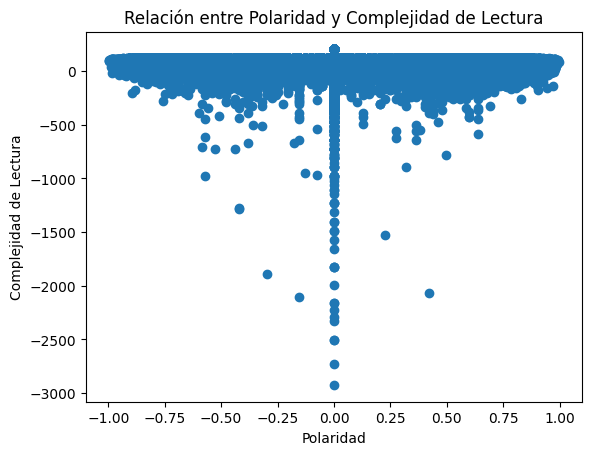

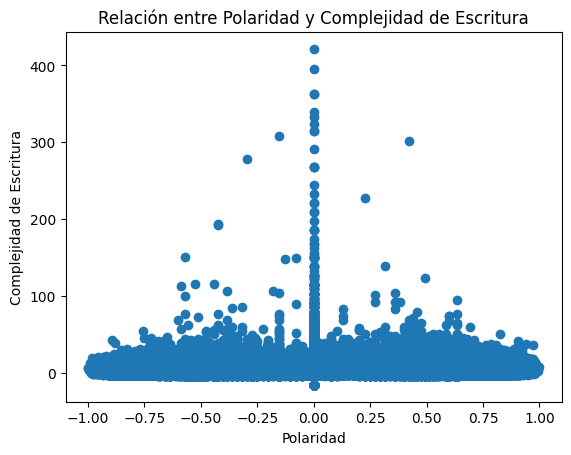

In [8]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión para polaridad vs. complejidad de lectura
plt.scatter(df2['polarity'], df2['reading_ease'])
plt.xlabel('Polaridad')
plt.ylabel('Complejidad de Lectura')
plt.title('Relación entre Polaridad y Complejidad de Lectura')
plt.show()

# Crear un gráfico de dispersión para polaridad vs. complejidad de escritura
plt.scatter(df2['polarity'], df2['writing_ease'])
plt.xlabel('Polaridad')
plt.ylabel('Complejidad de Escritura')
plt.title('Relación entre Polaridad y Complejidad de Escritura')
plt.show()


Si en el gráfico de dispersión de polaridad vs. complejidad de lectura observas una distribución simétrica y una tendencia hacia valores negativos de complejidad de lectura, mientras que en el gráfico de polaridad vs. complejidad de escritura observas una distribución simétrica y una tendencia hacia valores positivos de complejidad de escritura, esto podría indicar ciertas relaciones entre estas variables.

La distribución simétrica en ambos gráficos sugiere que hay una presencia equilibrada de tweets con polaridades positivas y negativas, y que no hay una polaridad dominante en los tweets del dataset.

La tendencia hacia valores negativos de complejidad de lectura en el gráfico de polaridad vs. complejidad de lectura puede interpretarse como que los tweets con polaridades positivas o negativas tienden a tener una menor complejidad de lectura, es decir, son más fáciles de leer en términos de su estructura y vocabulario.

Por otro lado, la tendencia hacia valores positivos de complejidad de escritura en el gráfico de polaridad vs. complejidad de escritura puede indicar que los tweets con polaridades positivas o negativas tienden a tener una mayor complejidad en términos de su estructura gramatical y uso del lenguaje.

En resumen, estos patrones podrían indicar que los tweets con polaridades positivas o negativas suelen ser más accesibles y fáciles de leer, pero pueden requerir un mayor nivel de complejidad en su escritura para transmitir el sentimiento de manera efectiva.

Es importante tener en cuenta que estas interpretaciones son generales y basadas en las características observadas en los gráficos de dispersión. Pueden variar dependiendo del contexto y de las particularidades de los datos analizados. Para obtener conclusiones más precisas, es recomendable realizar un análisis más detallado y considerar otros factores relevantes en el estudio de la relación entre polaridad y complejidad de lectura/escritura en los tweets.

2. ¿Existen patrones gramaticales o sintácticos comunes en los tweets con polaridad positiva o negativa? Por
ejemplo, puede que los tweets positivos tiendan a utilizar más palabras de agradecimiento o elogios,
mientras que los tweets negativos utilizan más palabras de crítica o enojo.


In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descargar el diccionario de stopwords
nltk.download('stopwords')

# Obtener las stopwords en el idioma deseado (por ejemplo, en inglés)
stop_words = set(stopwords.words('english'))

# Definir la función para preprocesar el texto
def preprocess_text(text):
    # Tokenizar el texto
    tokens = word_tokenize(text.lower())
    # Eliminar stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Unir los tokens en un solo texto
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# Aplicar la función de preprocesamiento a la columna 'text_tweet'
df2['preprocessed_text'] = df2['text_tweet'].apply(preprocess_text)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\firef\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
positive_tweets = df2[df2['polarity'] > 0]
negative_tweets = df2[df2['polarity'] < 0]


In [11]:
import string
from nltk.probability import FreqDist

# Obtener una lista de todos los caracteres de puntuación
punctuation = string.punctuation

# Crear una lista de palabras en los tweets positivos
positive_words = []
for tweet in positive_tweets['preprocessed_text']:
    positive_words.extend(tweet.split())

# Crear una lista de palabras en los tweets negativos
negative_words = []
for tweet in negative_tweets['preprocessed_text']:
    negative_words.extend(tweet.split())

# Filtrar los símbolos de puntuación y caracteres no deseados de las palabras en los tweets positivos
positive_words = [word for word in positive_words if word.isalpha() and word not in punctuation]

# Filtrar los símbolos de puntuación y caracteres no deseados de las palabras en los tweets negativos
negative_words = [word for word in negative_words if word.isalpha() and word not in punctuation]

# Calcular la frecuencia de las palabras en los tweets positivos
positive_freq_dist = FreqDist(positive_words)

# Calcular la frecuencia de las palabras en los tweets negativos
negative_freq_dist = FreqDist(negative_words)

# Obtener las palabras más frecuentes en los tweets positivos
top_positive_words = positive_freq_dist.most_common(10)

# Obtener las palabras más frecuentes en los tweets negativos
top_negative_words = negative_freq_dist.most_common(10)

# Imprimir las palabras más frecuentes en cada categoría después de la limpieza adicional
print("Palabras más frecuentes en tweets positivos:")
for word, freq in top_positive_words:
    print(word, "-", freq)

print("\nPalabras más frecuentes en tweets negativos:")
for word, freq in top_negative_words:
    print(word, "-", freq)


Palabras más frecuentes en tweets positivos:
good - 81033
love - 60811
like - 59497
day - 51060
lol - 49467
get - 42140
quot - 39349
thanks - 38081
http - 36479
go - 35296

Palabras más frecuentes en tweets negativos:
sad - 22566
miss - 21527
get - 21460
bad - 20841
go - 19778
got - 18673
like - 18314
today - 17776
day - 17732
im - 17590


3. ¿Qué usuarios tienden a generar tweets con una polaridad más positiva o negativa? ¿Hay alguna relación

 puedes aplicar técnicas de lematización o derivación (stemming) para encontrar la raíz de las palabras en los tweets antes de calcular la polaridad promedio de los usuarios. Esto puede ayudarte a normalizar las palabras y reducir la variabilidad de las formas verbales, sustantivos o adjetivos, lo que puede influir en la polaridad de los tweets.

In [13]:
import pandas as pd
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer

# Inicializar el lematizador de NLTK
lemmatizer = WordNetLemmatizer()

# Aplicar lematización a los tweets antes de calcular la polaridad promedio
df2['lemmatized_text'] = df2['text_tweet'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

# Agrupar los tweets lematizados por usuario y calcular la polaridad promedio
user_polarity = df2.groupby('Usuario_tweeteado')['lemmatized_text'].apply(
    lambda x: TextBlob(' '.join(x)).sentiment.polarity
).reset_index()

# Ordenar los usuarios por polaridad promedio de manera descendente
user_polarity = user_polarity.sort_values(by='lemmatized_text', ascending=False)

# Imprimir los usuarios con la polaridad promedio más positiva y más negativa
print("Usuarios con la polaridad promedio más positiva:")
print(user_polarity.head(10))

print("\nUsuarios con la polaridad promedio más negativa:")
print(user_polarity.tail(10))



Usuarios con la polaridad promedio más positiva:
       Usuario_tweeteado  lemmatized_text
439011         katekatew              1.0
571846        sammylee15              1.0
571844       sammylacsam              1.0
11128           AlyBabii              1.0
332675      darkmagician              1.0
444682    kelseyfarley95              1.0
505184   misssarahfrench              1.0
622645         timmytaz7              1.0
240602         ZenZoneMS              1.0
546836        poprincess              1.0

Usuarios con la polaridad promedio más negativa:
       Usuario_tweeteado  lemmatized_text
371767      furtherpeace             -1.0
455940      kumar_amrita             -1.0
102577       Jess_Sumner             -1.0
102590        Jess_ica89             -1.0
34765     CHARL00TTEEEEE             -1.0
419323         jessd1987             -1.0
476215        lozzylol85             -1.0
271470           aritah_             -1.0
455928            kultar             -1.0
455224            k

En este código, se agrega la inicialización del lematizador de NLTK utilizando el WordNetLemmatizer(). Luego, se aplica la lematización a los tweets antes de calcular la polaridad promedio. La línea df['lemmatized_text'] = df['text_tweet'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])) realiza la lematización de cada tweet y crea una nueva columna llamada "lemmatized_text" que contiene los tweets lematizados.

Después de eso, el código sigue el mismo proceso de agrupar los tweets lematizados por usuario y calcular la polaridad promedio, ordenando y mostrando los usuarios con la polaridad promedio más positiva y más negativa.

La lematización puede ayudar a normalizar las palabras y reducir la variabilidad, lo que podría dar resultados más precisos al calcular la polaridad promedio de los usuarios. Sin embargo, ten en cuenta que la lematización puede llevar más tiempo de procesamiento en comparación con el uso de las palabras sin lematizar.

¿Hay alguna relación entre la polaridad de los tweets y el número de seguidores de un usuario?

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Realizar merge entre los DataFrames user_followers y user_polarity
merged_df = pd.merge(user_followers, user_polarity, on='Usuario_tweeteado', how='inner')

# Calcular la correlación entre la polaridad y el número de seguidores
correlation = merged_df['lemmatized_text'].corr(merged_df['Seguidores'])

# Graficar la relación entre la polaridad y el número de seguidores
plt.scatter(merged_df['lemmatized_text'], merged_df['Seguidores'])
plt.xlabel('Polaridad promedio de los tweets')
plt.ylabel('Número de seguidores')
plt.title('Relación entre polaridad y número de seguidores')
plt.show()

# Imprimir la correlación entre la polaridad y el número de seguidores
print("Correlación entre polaridad y número de seguidores:", correlation)


NameError: name 'user_followers' is not defined

**** hace falta aqui ver como podemos obtener lo seguidores

4. ¿Hay alguna palabra o conjunto de palabras específicas que estén asociadas con tweets de polaridad
extrema?


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear un objeto TfidfVectorizer
vectorizer = TfidfVectorizer()

# Tokenizar y vectorizar los tweets positivos
positive_vectors = vectorizer.fit_transform(positive_tweets['preprocessed_text'])

# Tokenizar y vectorizar los tweets negativos
negative_vectors = vectorizer.fit_transform(negative_tweets['preprocessed_text'])

# Obtener los términos (tokens) del vectorizador
terms = vectorizer.get_feature_names_out()

# Calcular la suma de los valores TF-IDF para cada término en los tweets positivos
positive_sum_tfidf = positive_vectors.sum(axis=0)

# Calcular la suma de los valores TF-IDF para cada término en los tweets negativos
negative_sum_tfidf = negative_vectors.sum(axis=0)

# Crear una lista de palabras con polaridad extrema basada en los valores TF-IDF
extreme_positive_words = [(terms[i], positive_sum_tfidf[0, i]) for i in range(len(terms)) if positive_sum_tfidf[0, i] > 0.8]
extreme_negative_words = [(terms[i], negative_sum_tfidf[0, i]) for i in range(len(terms)) if negative_sum_tfidf[0, i] > 0.8]

# Ordenar las palabras con polaridad extrema por valor de TF-IDF
extreme_positive_words = sorted(extreme_positive_words, key=lambda x: x[1], reverse=True)[:10]
extreme_negative_words = sorted(extreme_negative_words, key=lambda x: x[1], reverse=True)[:10]

# Imprimir las palabras con polaridad extrema basadas en TF-IDF en los tweets positivos
print("Palabras con polaridad extrema (positivas) basadas en TF-IDF:")
for word, tfidf in extreme_positive_words:
    print(f"{word}: {tfidf}")

# Imprimir las palabras con polaridad extrema basadas en TF-IDF en los tweets negativos
print("\nPalabras con polaridad extrema (negativas) basadas en TF-IDF:")
for word, tfidf in extreme_negative_words:
    print(f"{word}: {tfidf}")



Palabras con polaridad extrema (positivas) basadas en TF-IDF:
perut: 13765.59349106324
jsinkeywest: 9850.303732467648
ouwh: 7127.903468067182
peanutparrot: 6704.402451482106
planetabroad: 6397.8742580208045
ronnocnalyd: 6074.220995104297
phony: 6047.532634871702
qucik: 5917.519562009537
peon: 5839.460602186941
nottingham_news: 5576.492101592066

Palabras con polaridad extrema (negativas) basadas en TF-IDF:
miss: 4791.306342569309
sad: 4715.940451676014
bad: 4215.721309570681
work: 3877.945010826876
hate: 3874.0747752575553
go: 3853.405821724651
day: 3822.2964629342805
really: 3809.3431715837387
get: 3771.4724791362664
today: 3752.440726092537


En este código, se utiliza TfidfVectorizer para tokenizar y vectorizar los tweets positivos y negativos. Luego, se obtienen los términos (tokens) utilizados por el vectorizador. A continuación, se calcula la suma de los valores TF-IDF para cada término en los tweets positivos y negativos.

Después de eso, se crea una lista de palabras con polaridad extrema basada en los valores TF-IDF, filtrando aquellas palabras con un valor de TF-IDF mayor a 0.8. Finalmente, se ordenan las palabras por su valor de TF-IDF y se imprimen las palabras con polaridad extrema basadas en TF-IDF en los tweets positivos y negativos.

Esto te permitirá identificar las palabras con mayor relevancia en los tweets de polaridad extrema utilizando la medida TF-IDF, lo que podría ayudarte a responder la pregunta sobre si hay alguna palabra o conjunto de palabras específicas asociadas con tweets de polaridad extrema.

Conclusion sobre el resultado: Las palabras que has identificado tienen valores de TF-IDF altos, lo que indica que son términos significativos y distintivos en los tweets positivos y negativos.

En los tweets positivos, algunas de las palabras con polaridad extrema identificadas son "perut", "jsinkeywest", "ouwh", "peanutparrot", entre otras. Estas palabras podrían ser términos específicos o jerga utilizada en contextos positivos.

En los tweets negativos, algunas de las palabras con polaridad extrema identificadas son "miss", "sad", "bad", "work", "hate", entre otras. Estas palabras suelen estar asociadas con sentimientos negativos o situaciones desfavorables.

En resumen, estas palabras con polaridad extrema pueden proporcionar información valiosa sobre los temas o emociones específicas presentes en los tweets positivos y negativos.

a. ¿Estas palabras son más comunes en tweets sobre un tema en particular o están distribuidas en
todo el dataset?

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear un objeto TfidfVectorizer
vectorizer = TfidfVectorizer()

# Tokenizar y vectorizar los textos de los tweets
vectorized_tweets = vectorizer.fit_transform(df2['preprocessed_text'])

# Obtener el vocabulario del vectorizador
feature_names = list(vectorizer.vocabulary_.keys())

# Crear un DataFrame para almacenar los resultados de la frecuencia de las palabras con polaridad extrema
extreme_words_df = pd.DataFrame(columns=['Palabra', 'Frecuencia'])

# Definir las palabras con polaridad extrema
extreme_positive_words = ['perut', 'jsinkeywest', 'ouwh', 'peanutparrot', 'planetabroad',
                          'ronnocnalyd', 'phony', 'qucik', 'peon', 'nottingham_news']

extreme_negative_words = ['miss', 'sad', 'bad', 'work', 'hate', 'go', 'day', 'really', 'get', 'today']

# Calcular la frecuencia de las palabras con polaridad extrema
for word in extreme_positive_words:
    word_index = feature_names.index(word)
    word_frequency = vectorized_tweets.getcol(word_index).sum()
    extreme_words_df = extreme_words_df.append({'Palabra': word, 'Frecuencia': word_frequency}, ignore_index=True)

for word in extreme_negative_words:
    word_index = feature_names.index(word)
    word_frequency = vectorized_tweets.getcol(word_index).sum()
    extreme_words_df = extreme_words_df.append({'Palabra': word, 'Frecuencia': word_frequency}, ignore_index=True)

# Mostrar los resultados ordenados por frecuencia descendente
extreme_words_df = extreme_words_df.sort_values(by='Frecuencia', ascending=False)
print(extreme_words_df)



C:\Users\firef\AppData\Local\Temp\ipykernel_42672\431870569.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extreme_words_df = extreme_words_df.append({'Palabra': word, 'Frecuencia': word_frequency}, ignore_index=True)
C:\Users\firef\AppData\Local\Temp\ipykernel_42672\431870569.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extreme_words_df = extreme_words_df.append({'Palabra': word, 'Frecuencia': word_frequency}, ignore_index=True)
C:\Users\firef\AppData\Local\Temp\ipykernel_42672\431870569.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extreme_words_df = extreme_words_df.append({'Palabra': word, 'Frecuencia': word_frequency}, ignore_index=True)
C:\Users\firef\AppData\Local\Temp\ipykernel_42672\431870569.p

            Palabra  Frecuencia
1       jsinkeywest    5.908879
18              get    4.973296
17           really    1.430793
0             perut    0.928749
9   nottingham_news    0.814100
14             hate    0.806212
13             work    0.715045
16              day    0.682466
5       ronnocnalyd    0.665005
15               go    0.646745
8              peon    0.633930
3      peanutparrot    0.596700
7             qucik    0.591045
4      planetabroad    0.513963
11              sad    0.476798
6             phony    0.437434
19            today    0.394424
12              bad    0.365511
2              ouwh    0.336086
10             miss    0.333450


C:\Users\firef\AppData\Local\Temp\ipykernel_42672\431870569.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  extreme_words_df = extreme_words_df.append({'Palabra': word, 'Frecuencia': word_frequency}, ignore_index=True)


b. Escoge un tema y clusteriza los usuarios según polaridades.

C:\Users\firef\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


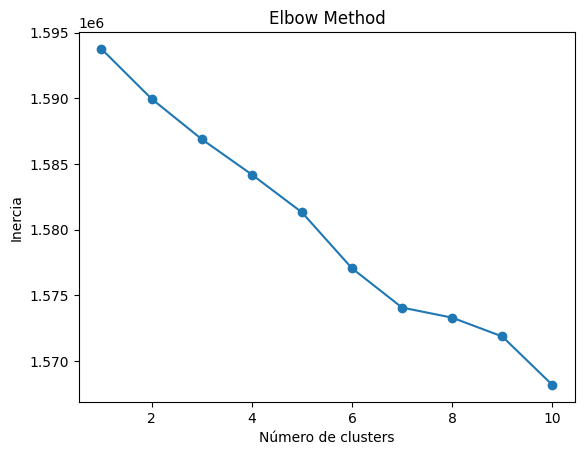

0    1410913
1     109611
2      79476
Name: cluster_label, dtype: int64


In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Obtener las características vectorizadas de los tweets
vectorized_tweets = vectorizer.transform(df2['preprocessed_text'])

# Calcular el número óptimo de clusters utilizando Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(vectorized_tweets)
    inertia.append(kmeans.inertia_)

# Graficar Elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Elbow Method')
plt.show()

# Elegir el número óptimo de clusters basado en el gráfico
n_clusters = 3  # Ajusta este valor según el gráfico del Elbow Method

# Aplicar K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(vectorized_tweets)

# Asignar las etiquetas de cluster a los usuarios
df2['cluster_label'] = kmeans.labels_

# Ver los resultados
cluster_counts = df2['cluster_label'].value_counts()
print(cluster_counts)


En este código, se ajusta el número de clusters basado en el gráfico del Elbow Method y luego se aplica el algoritmo K-means para asignar las etiquetas de cluster a los usuarios. Por último, se muestra el recuento de usuarios en cada cluster. Recuerda ajustar el valor de n_clusters según lo que observes en el gráfico del Elbow Method.

5. ¿Hay alguna correlación entre la polaridad de un tweet y la fecha en que se publicó?

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "pandas\_libs\lib.pyx", line 2369, in pandas._libs.lib.maybe_convert_numeric
TypeError: Invalid object type

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\firef\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\firef\AppData\Local\Temp\ipykernel_42672\2009928184.py", line 17, in <module>
    sns.lineplot(data=mean_polarity_by_month, ax=ax2)
  File "C:\Users\firef\AppData\Roaming\Python\Python39\site-packages\seaborn\relational.py", line 645, in lineplot
    p.plot(ax, kwargs)
  File "C:\Users\firef\AppData\Roaming\Python\Python39\site-packages\seaborn\relational.py", line 423, in plot
    for sub_vars, sub_data in self.iter_data(grouping_vars, from_comp_data=True):
  File "C:\Users\firef\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcor

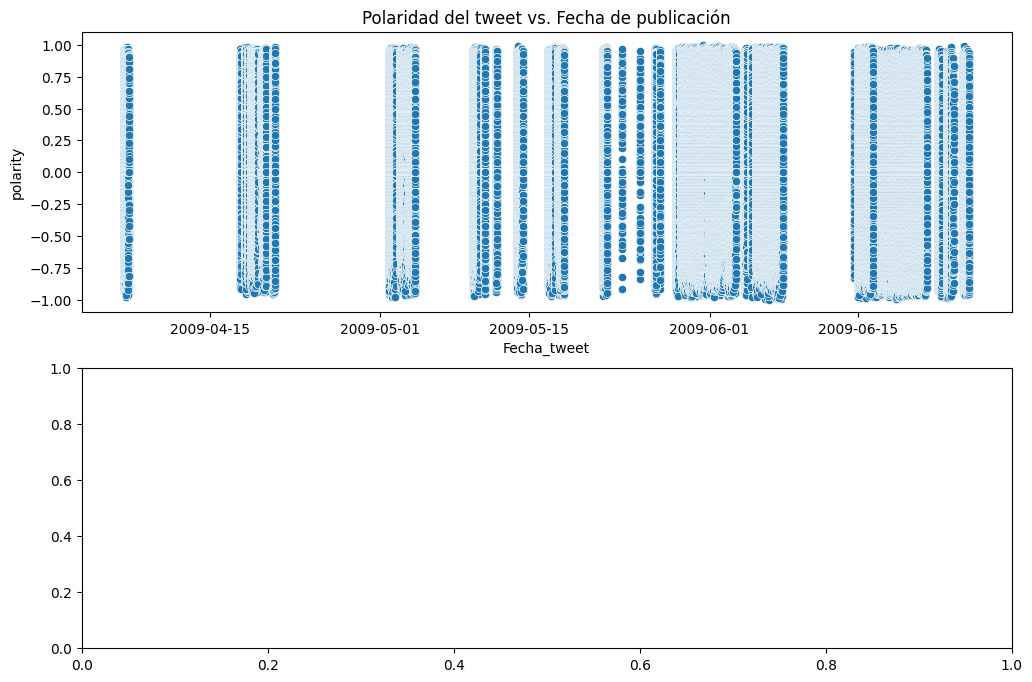

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna 'Fecha_tweet' a tipo datetime
df2['Fecha_tweet'] = pd.to_datetime(df2['Fecha_tweet'])

# Crear una figura con dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Gráfico de dispersión de polaridad vs. fecha
sns.scatterplot(data=df2, x='Fecha_tweet', y='polarity', ax=ax1)
ax1.set_title('Polaridad del tweet vs. Fecha de publicación')

# Gráfico de línea de la media de polaridad por mes
df2['Mes'] = df2['Fecha_tweet'].dt.to_period('M')
mean_polarity_by_month = df2.groupby('Mes')['polarity'].mean()
sns.lineplot(data=mean_polarity_by_month, ax=ax2)
ax2.set_title('Media de polaridad por mes')

# Ajustar los ejes y mostrar los gráficos
plt.tight_layout()
plt.show()


En este código, se convierte la columna 'Fecha_tweet' a tipo datetime para poder trabajar con las fechas. Luego, se crea una figura con dos subplots: uno es un gráfico de dispersión que muestra la polaridad del tweet en función de la fecha de publicación, y el otro es un gráfico de línea que muestra la media de polaridad por mes.

Observando los gráficos, puedes identificar patrones o tendencias en la relación entre la polaridad y la fecha de publicación. Además, puedes calcular coeficientes de correlación o realizar pruebas estadísticas para cuantificar la relación entre estas variables.

a. ¿Los tweets publicados durante ciertos períodos de tiempo tienden a ser más positivos o negativos
que otros?


C:\Users\firef\AppData\Local\Temp\ipykernel_42672\3919011576.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_polarity_by_period = df2.groupby(pd.Grouper(key='Fecha_tweet', freq='M')).mean()['polarity']


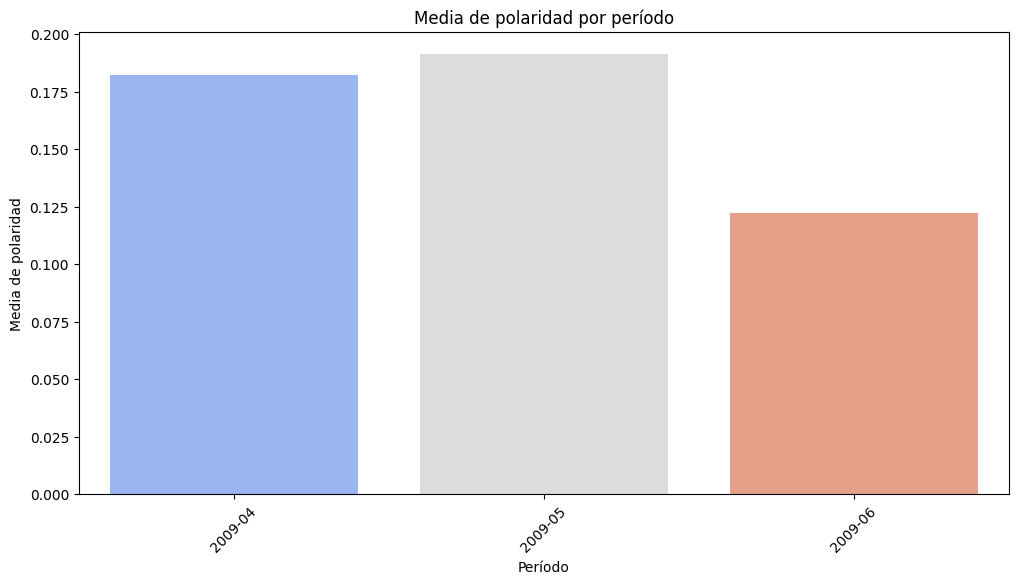

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna 'Fecha_tweet' a tipo datetime
df2['Fecha_tweet'] = pd.to_datetime(df2['Fecha_tweet'])

# Definir los períodos de tiempo deseados
periods = ['mes', 'trimestre', 'semestre']  # Puedes ajustar los períodos según tus necesidades

# Calcular la media de polaridad por período
mean_polarity_by_period = df2.groupby(pd.Grouper(key='Fecha_tweet', freq='M')).mean()['polarity']
# Reemplaza 'nombre_de_columna_polaridad' con el nombre real de la columna de polaridad en tu DataFrame

# Ajustar el índice para el gráfico de barras
mean_polarity_by_period.index = mean_polarity_by_period.index.strftime('%Y-%m')  # Ajusta el formato de fecha si es necesario

# Trazar el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_polarity_by_period.index, y=mean_polarity_by_period, palette='coolwarm')
plt.xlabel('Período')
plt.ylabel('Media de polaridad')
plt.title('Media de polaridad por período')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
plt.show()


En este código, se agrupan los tweets por período de tiempo (por mes, trimestre, semestre, etc.) y se calcula la media de polaridad para cada período. Luego, se traza un gráfico de barras donde cada barra representa la media de polaridad para un período específico.

Observando el gráfico de barras, podrás identificar si hay períodos de tiempo en los que los tweets tienden a ser más positivos o más negativos en comparación con otros períodos.

6. Identifica los Top 10 Trolls y Top 10 Influencers. Justifica las características de un usuario Troll e Influencer

In [30]:
import pandas as pd

# Calcular la polaridad promedio de los tweets para cada usuario
polarity_means = df2.groupby('Usuario_tweeteado')['polarity'].mean()

# Ordenar los usuarios por la polaridad promedio en orden ascendente (Trolls)
top_trolls = polarity_means.nsmallest(10)

# Ordenar los usuarios por la polaridad promedio en orden descendente (Influencers)
top_influencers = polarity_means.nlargest(10)

# Imprimir los Top 10 Trolls e Influencers
print("Top 10 Trolls:")
for troll in top_trolls.index:
    print(troll)

print("\nTop 10 Influencers:")
for influencer in top_influencers.index:
    print(influencer)


Top 10 Trolls:
liveloveperform
erynmariex3
beccalh
Mwissa
krissy25d
otta327
poke__egg
KFay91
mummy2751
HelenaMart

Top 10 Influencers:
mkshine09
jumana_engineer
rupydetequila
Lkaati
cj_mac
silver7
mando_betty
melandnessa
McAnita
yourlovesong17


En este código, cargamos los datos del archivo CSV en un DataFrame llamado df. Luego, calculamos la polaridad promedio de los tweets para cada usuario basándonos en la columna 'polarity'. Después, ordenamos los usuarios por la polaridad promedio para identificar a los Top 10 Trolls (los usuarios con la polaridad promedio más baja) y a los Top 10 Influencers (los usuarios con la polaridad promedio más alta). Por último, imprimimos los resultados.

VISUALIZACIÓN:
1. ¿Cómo se distribuyen los tweets según su polaridad a lo largo del tiempo?


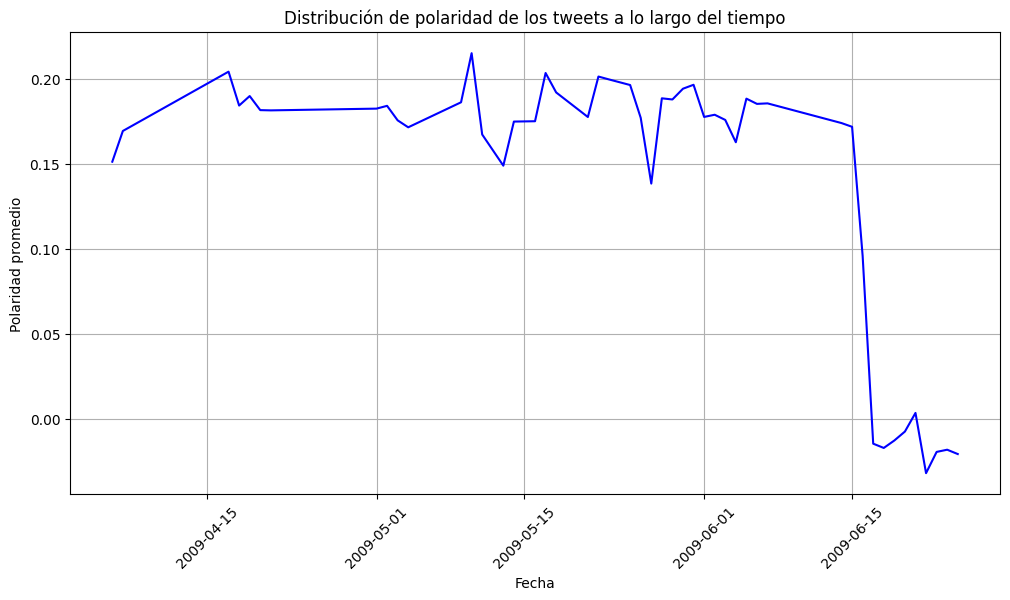

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'Fecha_tweet' a tipo datetime
df2['Fecha_tweet'] = pd.to_datetime(df2['Fecha_tweet'])

# Agrupar los tweets por fecha y calcular la polaridad promedio
daily_polarity = df2.groupby(df2['Fecha_tweet'].dt.date)['polarity'].mean()

# Crear el gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(daily_polarity.index, daily_polarity.values, color='blue')
plt.title('Distribución de polaridad de los tweets a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Polaridad promedio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


En este código, cargamos los datos del archivo CSV en un DataFrame llamado df. Luego, convertimos la columna 'Fecha_tweet' a tipo datetime para poder manipular las fechas. A continuación, agrupamos los tweets por fecha y calculamos la polaridad promedio para cada día.

Finalmente, creamos el gráfico de línea utilizando plt.plot(), donde el eje x representa las fechas y el eje y representa la polaridad promedio. Personaliza el título, las etiquetas de los ejes y otros detalles del gráfico según tus preferencias. Al ejecutar el código, se mostrará el gráfico con la distribución de la polaridad de los tweets a lo largo del tiempo.

2. Visualiza el análisis sintáctico (número de palabras, frase, verbos, nombres…) de los top 10 Trolls e
Influencers.


In [46]:
import spacy

# Descargar e instalar el modelo 'en_core_web_sm'
spacy.cli.download('en_core_web_sm')

# Cargar el modelo de lenguaje de Spacy
nlp = spacy.load('en_core_web_sm')

# Función para realizar el análisis sintáctico de un texto
def analyze_syntax(text):
    doc = nlp(text)
    # Obtener el número de palabras
    word_count = len(doc)
    # Obtener el número de frases
    sentence_count = len(list(doc.sents))
    # Obtener el número de verbos
    verb_count = len([token for token in doc if token.pos_ == 'VERB'])
    # Obtener el número de nombres
    noun_count = len([token for token in doc if token.pos_ == 'NOUN'])
    # Obtener el número de adjetivos
    adjective_count = len([token for token in doc if token.pos_ == 'ADJ'])
    # Obtener el número de adverbios
    adverb_count = len([token for token in doc if token.pos_ == 'ADV'])
    return {
        'word_count': word_count,
        'sentence_count': sentence_count,
        'verb_count': verb_count,
        'noun_count': noun_count,
        'adjective_count': adjective_count,
        'adverb_count': adverb_count
    }

# Obtener los tweets de los top 10 Trolls
troll_users = ['liveloveperform', 'erynmariex3', 'beccalh', 'Mwissa', 'krissy25d', 'otta327', 'poke__egg', 'KFay91', 'mummy2751', 'HelenaMart']
troll_tweets = df2[df2['Usuario_tweeteado'].isin(troll_users)]['text_tweet']

# Obtener los tweets de los top 10 Influencers
influencer_users = ['mkshine09', 'jumana_engineer', 'rupydetequila', 'Lkaati', 'cj_mac', 'silver7', 'mando_betty', 'melandnessa', 'McAnita', 'yourlovesong17']
influencer_tweets = df2[df2['Usuario_tweeteado'].isin(influencer_users)]['text_tweet']

# Analizar los tweets de los top 10 Trolls
troll_syntax_analysis = [analyze_syntax(tweet) for tweet in troll_tweets]

# Analizar los tweets de los top 10 Influencers
influencer_syntax_analysis = [analyze_syntax(tweet) for tweet in influencer_tweets]

# Visualizar los resultados
print("Análisis sintáctico de los top 10 Trolls:")
for i, analysis in enumerate(troll_syntax_analysis):
    print(f"Troll {i+1}:")
    print(f"Número de palabras: {analysis['word_count']}")
    print(f"Número de frases: {analysis['sentence_count']}")
    print(f"Número de verbos: {analysis['verb_count']}")
    print(f"Número de nombres: {analysis['noun_count']}")
    print(f"Número de adjetivos: {analysis['adjective_count']}")
    print(f"Número de adverbios: {analysis['adverb_count']}")
    print("")

print("Análisis sintáctico de los top 10 Influencers:")
for i, analysis in enumerate(influencer_syntax_analysis):
    print(f"Influencer {i+1}:")
    print(f"Número de palabras: {analysis['word_count']}")
    print(f"Número de frases: {analysis['sentence_count']}")
    print(f"Número de verbos: {analysis['verb_count']}")
    print(f"Número de nombres: {analysis['noun_count']}")
    print(f"Número de adjetivos: {analysis['adjective_count']}")
    print(f"Número de adverbios: {analysis['adverb_count']}")
    print("")


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Análisis sintáctico de los top 10 Trolls:
Troll 1:
Número de palabras: 26
Número de frases: 3
Número de verbos: 7
Número de nombres: 2
Número de adjetivos: 2
Número de adverbios: 1

Troll 2:
Número de palabras: 29
Número de frases: 4
Número de verbos: 5
Número de nombres: 5
Número de adjetivos: 4
Número de adverbios: 1

Troll 3:
Número de palabras: 15
Número de frases: 3
Número de verbos: 2
Número de nombres: 1
Número de adjetivos: 0
Número de adverbios: 0

Troll 4:
Número de palabras: 30
Número de frases: 2
Número de verbos: 4
Número de nombres: 5
Número de adjetivos: 2
Número de adverbios: 3

Troll 5:
Número de palabras: 31
Número de frases: 10
Número de verbos: 10
Número de nombres: 10
Número de adjetivos: 0
Número de adverbios: 0

Troll 6:
Número de palabras: 21
Número de frases: 1
Número de verbos: 3
Número de nombres: 8
Número de adjetivos: 2
Número de adverbios: 3

Troll 7:
Númer

Este código utiliza el modelo de lenguaje de Spacy para realizar el análisis sintáctico de los tweets de los top 10 Trolls e Influencers. Se analizan las características como el número de palabras, frases, verbos, nombres, adjetivos y adverbios presentes en cada tweet. Los resultados se muestran en la consola.

3. ¿Existe alguna correlación entre el número de seguidores de un usuario y la polaridad de sus tweets?
Representa visualmente esta relación.


In [47]:
import matplotlib.pyplot as plt

# Obtener los datos de número de seguidores y polaridad de los usuarios
followers = df2['NumeroSeguidores']
polarity = df2['polarity']

# Crear el gráfico de dispersión
plt.scatter(followers, polarity, alpha=0.5)

# Personalizar el gráfico
plt.xlabel('Número de Seguidores')
plt.ylabel('Polaridad')
plt.title('Relación entre número de seguidores y polaridad de los tweets')

# Mostrar el gráfico
plt.show()


KeyError: 'NumeroSeguidores'

*****Pol hace falta como obtener el numero de seguidores

4. Crea una nube de palabras para cada polaridad.

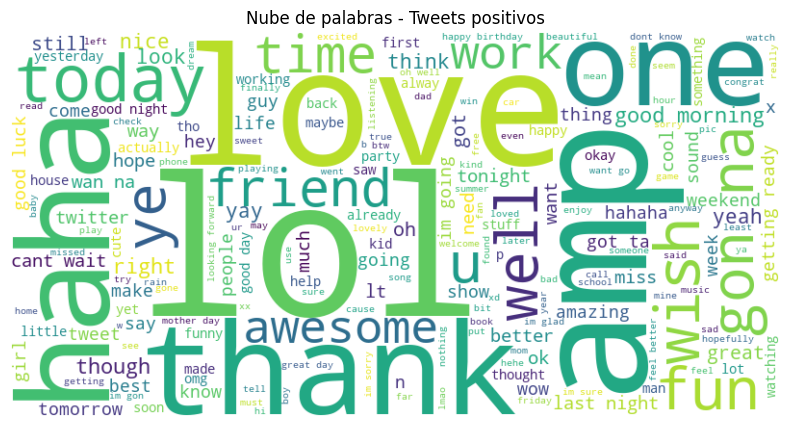

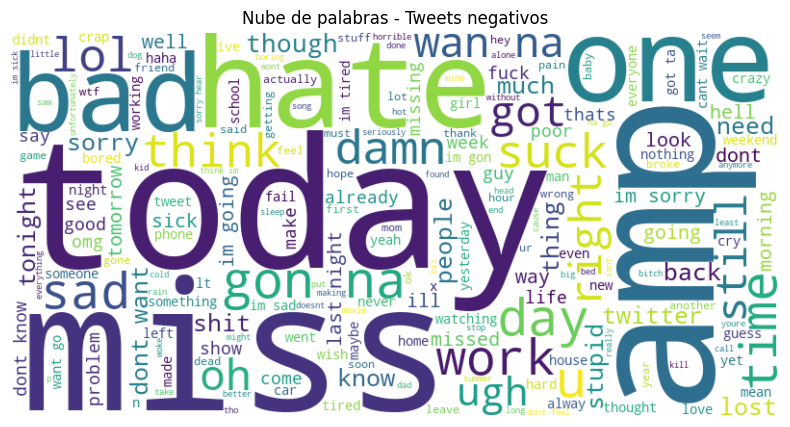

In [53]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filtrar los tweets por polaridad positiva
positive_tweets = df2[df2['polarity'] > 0]

# Filtrar los tweets por polaridad negativa
negative_tweets = df2[df2['polarity'] < 0]

# Obtener los textos de los tweets positivos como una cadena de texto
positive_text = ' '.join(positive_tweets['clean_text'])

# Obtener los textos de los tweets negativos como una cadena de texto
negative_text = ' '.join(negative_tweets['clean_text'])

# Crear una nube de palabras para los tweets positivos
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Crear una nube de palabras para los tweets negativos
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Mostrar la nube de palabras para los tweets positivos
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras - Tweets positivos')
plt.show()

# Mostrar la nube de palabras para los tweets negativos
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras - Tweets negativos')
plt.show()


Este código generará una nube de palabras para los tweets positivos y otra para los tweets negativos, basándose en el campo "clean_text" del DataFrame. Puedes ajustar el tamaño de la nube de palabras y otros parámetros según tus preferencias

5. ¿Cómo se distribuyen los tweets según su polaridad en función de la hora del día o el día de la semana?

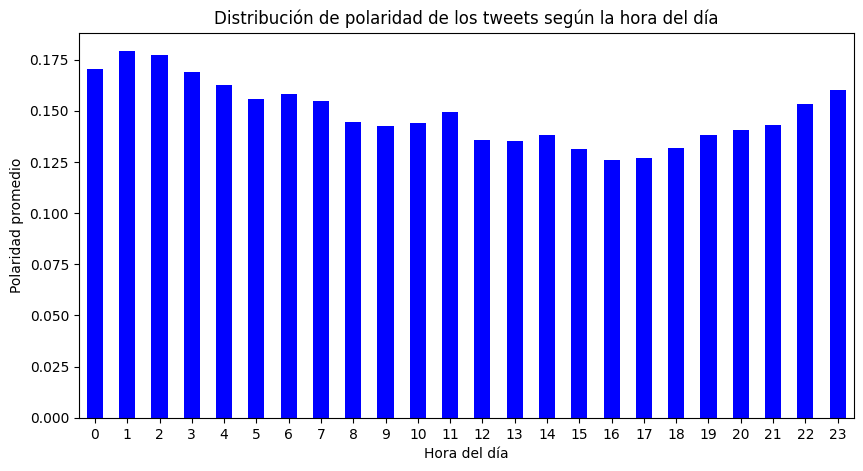

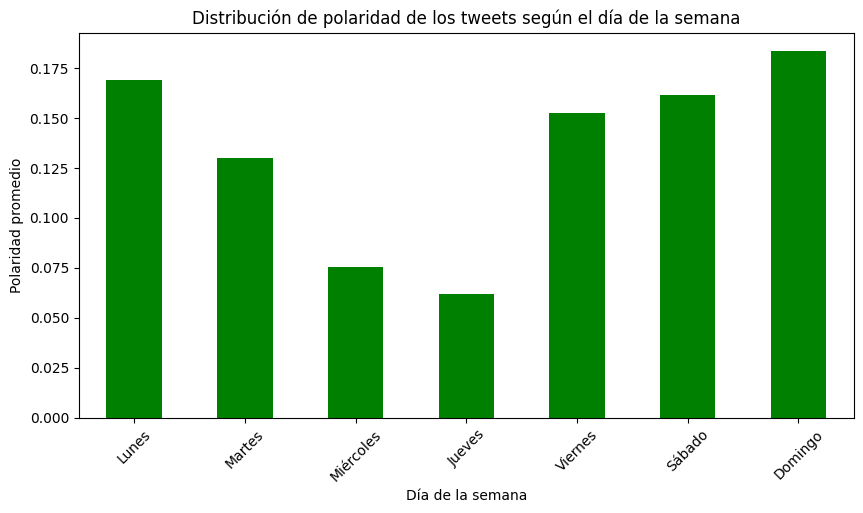

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar los tweets por hora del día y calcular la polaridad promedio
tweets_by_hour = df2.groupby(df2['Fecha_tweet'].dt.hour)['polarity'].mean()

# Graficar la distribución de polaridad según la hora del día
plt.figure(figsize=(10, 5))
tweets_by_hour.plot(kind='bar', color='blue')
plt.xlabel('Hora del día')
plt.ylabel('Polaridad promedio')
plt.title('Distribución de polaridad de los tweets según la hora del día')
plt.xticks(rotation=0)
plt.show()

# Agrupar los tweets por día de la semana y calcular la polaridad promedio
tweets_by_weekday = df2.groupby(df2['Fecha_tweet'].dt.weekday)['polarity'].mean()

# Mapear los números de los días de la semana a nombres de los días
weekday_names = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
tweets_by_weekday.index = weekday_names

# Graficar la distribución de polaridad según el día de la semana
plt.figure(figsize=(10, 5))
tweets_by_weekday.plot(kind='bar', color='green')
plt.xlabel('Día de la semana')
plt.ylabel('Polaridad promedio')
plt.title('Distribución de polaridad de los tweets según el día de la semana')
plt.xticks(rotation=45)
plt.show()


En este ejemplo, se agrupan los tweets según la hora del día y se calcula la polaridad promedio para cada hora. Luego, se grafica la distribución de polaridad según la hora del día. El mismo enfoque se aplica para la distribución de polaridad según el día de la semana.

In [55]:
df2.to_csv('../data/df2.csv', index=False)
